# Seattle Wheather

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv('seattle-weather.csv')

In [4]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [8]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [7]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


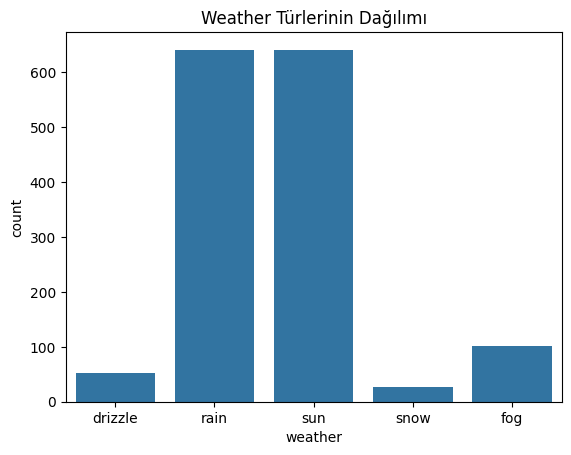

In [10]:
sns.countplot(x='weather', data=df)
plt.title("Weather Türlerinin Dağılımı")
plt.show()

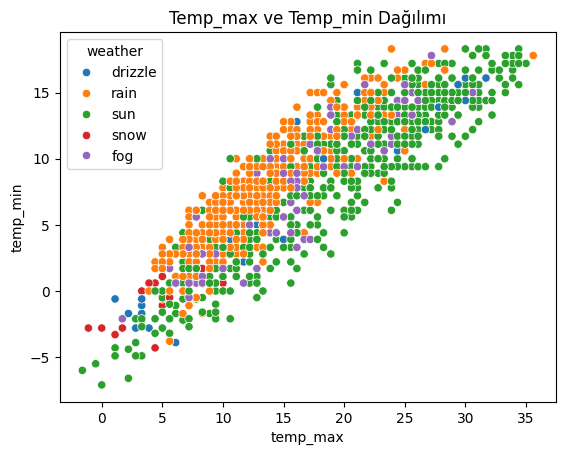

In [11]:
# Temp_min ve temp_max'in ilişkisinin görselleştirilmesi
sns.scatterplot(x='temp_max', y='temp_min', hue='weather', data=df)
plt.title("Temp_max ve Temp_min Dağılımı")
plt.show()

## Naive Bayes Algorithm

In [12]:
# Tarih sütunu gereksiz, bu yüzden çıkarıyoruz
df1 = df.drop(columns=['date'])

In [13]:
weather_mapping = {
    'drizzle': 0,
    'rain': 1,
    'sun': 2,
    'snow': 3,
    'fog': 4
}

In [14]:

df1['weather_encoded'] = df1['weather'].map(weather_mapping)

In [15]:
# 'weather_encoded' etiketimiz olacak, geri kalanı özellik
X = df1.drop(columns=['weather', 'weather_encoded'])
y = df1['weather_encoded']

In [16]:
# 6. Eğitim ve Test Setine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
naive_bayes_model = GaussianNB()

In [18]:
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred = naive_bayes_model.predict(X_test)

In [20]:
print("Accuracy: ", accuracy_score(y_test, y_pred))  # Doğruluk oranı
print("Classification Report: \n", classification_report(y_test, y_pred))  # Ayrıntılı rapor


Accuracy:  0.8293515358361775
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.96      0.91      0.94       120
           2       0.76      0.99      0.86       131
           3       0.57      0.50      0.53         8
           4       0.00      0.00      0.00        25

    accuracy                           0.83       293
   macro avg       0.46      0.48      0.47       293
weighted avg       0.75      0.83      0.78       293



c:\Users\csm_h\OneDrive\Masaüstü\GelecekHayalim-VeriBilimi\Week-5\datasets\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\csm_h\OneDrive\Masaüstü\GelecekHayalim-VeriBilimi\Week-5\datasets\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\csm_h\OneDrive\Masaüstü\GelecekHayalim-VeriBilimi\Week-5\datasets\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

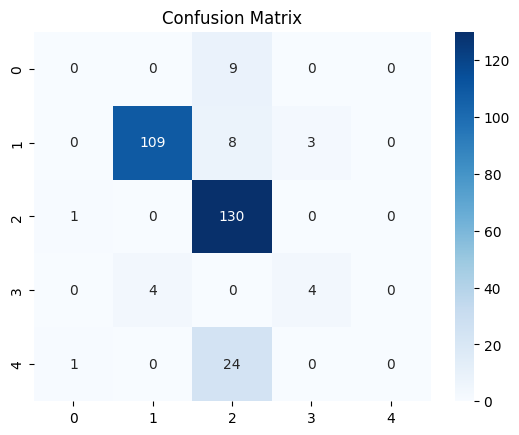

In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()